# Dies ist eine markdown cell
## und das ist kleiner
### noch kleiner
#### noch viel kleiner
##### noch viel viel kleiner
Ab jetzt ohne hashtag

**Fett**

*italic*

1. a
1. b

* a
* b

Dies ist eine inline Formel $e^{i\pi}+1=0$

\begin{equation}
i\hbar\frac{\partial\Psi}{\partial t}=\hat{H}\Psi
\end{equation}

# Hier steht der Titel

In [1]:
# Wir laden die Bibliotheken
import numpy as np
import cv2   # Open computer vision library
import matplotlib.pyplot as plt  # aus matplotlib brauche wir nur pyplot

In [2]:
img = cv2.imread('Picture.jpg',0) #Lade das Bild
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT) #Fouriertransformation des Bildes
dft_shift = np.fft.fftshift(dft) # Verschieben der 0 ins Zentrum

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

<IPython.core.display.Javascript object>


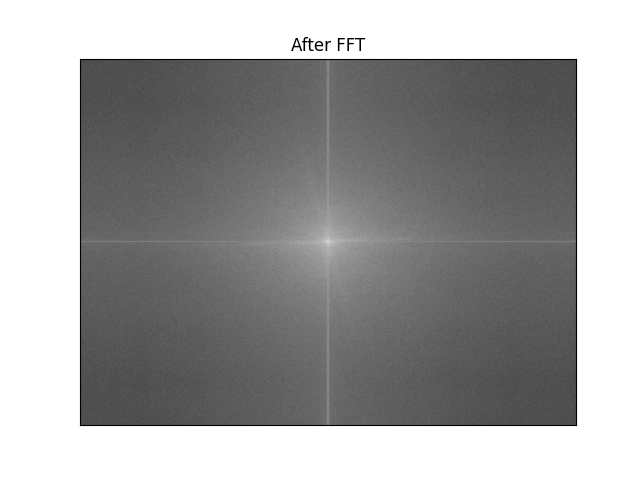

In [3]:
%matplotlib notebook
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('After FFT'), plt.xticks([]), plt.yticks([])
#plt.show()
plt.savefig('AfterFFT.png')

<IPython.core.display.Javascript object>


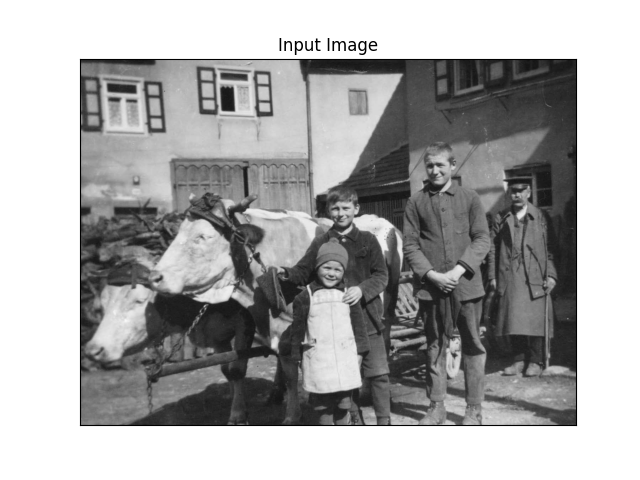

In [4]:
%matplotlib notebook
plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
#plt.show()
plt.savefig('InputImage.png')

/var/folders/_g/q__xsyh10ns0l94mkn0pmp3w0000gn/T/ipykernel_31310/1028004020.py:26: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


<IPython.core.display.Javascript object>


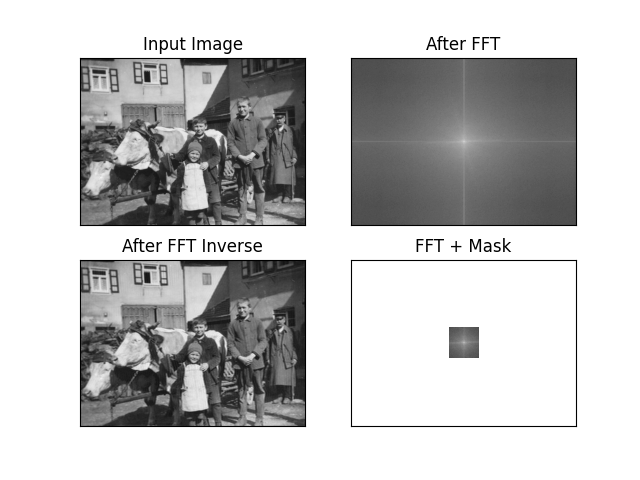

In [5]:
%matplotlib notebook
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)  # center

# Circular HPF mask, center circle is 0, remaining all ones

mask = np.ones((rows, cols, 2), np.uint8)
#mask = np.zeros((rows, cols, 2), np.uint8)
r1 = 60
r2 = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area2 = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r2*r2
mask_area1 = (x - center[0]) ** 2 + (y - center[1]) ** 2 >= r1*r1
mask[np.logical_and(mask_area1,mask_area2)] = 0
#mask[np.logical_not(mask_area)] = 0

# apply mask and inverse DFT
#fshift = dft_shift * mask
dft_shift[:,(cols//2+100):]=0
dft_shift[:,0:(cols//2-100)]=0
dft_shift[(rows//2+100):]=0
dft_shift[0:(rows//2-100)]=0
fshift = dft_shift 

fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)*10
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

fig, axs = plt.subplots(2,2)
#ax.plot(x,erf(x))
#ax.plot(x,np.exp(-x**2))
plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('After FFT'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(fshift_mask_mag, cmap='gray')
plt.title('FFT + Mask'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(img_back, cmap='gray')
plt.title('After FFT Inverse'), plt.xticks([]), plt.yticks([])
plt.show()
plt.savefig('Filter.png')

<IPython.core.display.Javascript object>


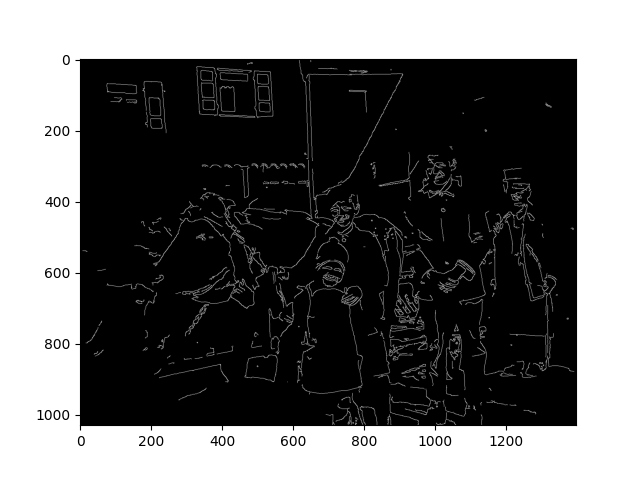

In [6]:
%matplotlib notebook
edges = cv2.Canny(img,100,200)
fig, ax = plt.subplots()
#ax1.imshow(img,cmap = 'gray')
ax.imshow(edges,cmap = 'gray')
fig.savefig('Edges')

In [ ]:
image=plt.imread('InputImage.png')
plt.imshow(image)

In [ ]:
np.logical_not(mask_area)

In [ ]:
dft_shift[0:-1:10,0:-1:10]=0

In [ ]:
dft_shift[100,99]

In [ ]:
a = np.arange(100)

In [ ]:
a.reshape((10,10))[:,5:]

In [ ]:
x+y**2

In [ ]:
(x+y).shape

In [ ]:
%%html
<table><tr><th>hi</th><th>bye</th></tr><tr><td>test</td><td>hello</td></tr></table>
<img src=”https://raw.githubusercontent.com/argreiner/FreiburgSeminar/master/Picture.jpg”>

In [ ]:
%matplotlib notebook
t = np.linspace(0,2*np.pi,100)
y1 = np.sin(t)
y2 = np.sin(2*t)
y3 = np.sin(3*t)
y4 = np.sin(4*t)
y=img[500]
#plt.plot(y1)
#plt.plot(y2)
#plt.plot(y3)
#plt.plot(y4)
plt.plot(3*y1+2*y2-2*y3+1*y4)

In [ ]:
t.shape

In [ ]:
y.shape

In [ ]:
img[900,500]

In [ ]:
matrix = np.ones((100,100))

In [ ]:
matrix[0:49,0:49]=50
matrix[0:49,50:-1]=100
matrix[50:-1,0:49]=150
matrix[50:-1,50:-1]=200

In [ ]:
plt.imshow(matrix, cmap='gray')

In [12]:
dft[500,500]

array([-82.56114, 200.4734 ], dtype=float32)

In [13]:
np.max(dft)

158094620.0